<a href="https://colab.research.google.com/github/Karame12/Projects/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Trees:

In [ ]:
# Importing data:

import pandas as pd

auto = pd.read_csv("Auto.csv")
auto = auto[auto.columns.drop("name")]
auto = auto[auto.columns.drop("origin")]

In [ ]:
# Splitting data into train and test:
train_data = auto.sample(frac = 0.5, random_state = 0)
test_data = auto.drop(train_data.index)

In [ ]:
train_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
144,28.0,4,90.0,75,2125,14.5,74
280,22.3,4,140.0,88,2890,17.3,79
68,12.0,8,350.0,160,4456,13.5,72
372,38.0,4,105.0,63,2125,14.7,82
328,33.8,4,97.0,67,2145,18.0,80


In [ ]:
# Understanding the problem & data:

# First_Node:
first_node = train_data[(train_data['horsepower'] < 104)]
print("Number of samples:", len(first_node))

Number of samples: 120


In [ ]:
# First_Node:
from numpy import mean
print(mean(first_node['mpg']))

27.618333333333332


In [ ]:
# First Node Mean Squared Error:

first_node_mse = mean(((train_data['mpg'] - mean(first_node['mpg']))**2))
print(first_node_mse)

77.60079699546485


In [ ]:
# Number of Sample
second_node = train_data[(train_data['horsepower'] > 104)]
print("Number of samples:", len(second_node))

Number of samples: 76


In [ ]:
# Second_node:
print(mean(second_node['mpg']))

16.66184210526316


In [ ]:
# Second Node Mean Squared Error:
second_node_mse = mean(((train_data['mpg'] - mean(second_node['mpg']))**2))
print(second_node_mse)

104.54960720645599


In [ ]:
# Model Estimation I:

train_tune = train_data.sample(frac = 0.8, random_state = 0)
train_validation = train_data.drop(train_tune.index)

tuning_predictor_variables = train_tune[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']]

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
est = tree.DecisionTreeRegressor(random_state = 0)
model = est.fit(tuning_predictor_variables, train_tune['mpg'])
plt.rcParams["figure.figsize"] = (100,100)
tree.plot_tree(model, fontsize = 10)
plt.show()

In [ ]:
# Model Estimation I: (Building another tree using cost complextiy pruning)
model.cost_complexity_pruning_path(tuning_predictor_variables, train_tune['mpg'])
path = model.cost_complexity_pruning_path(tuning_predictor_variables, train_tune['mpg'])
alpha_set = path['ccp_alphas']
R_values_set = path['impurities']

In [ ]:
print(alpha_set)
print(R_values_set)

[0.00000000e+00 3.18471338e-05 3.18471338e-05 3.18471338e-05
 3.18471338e-05 1.27388535e-04 1.27388535e-04 1.69851380e-04
 2.76008493e-04 2.86624204e-04 5.09554140e-04 5.09554140e-04
 7.96178344e-04 7.96178344e-04 8.59872611e-04 8.59872611e-04
 1.06157113e-03 1.09076433e-03 1.19426752e-03 1.19426752e-03
 1.28450106e-03 1.56050955e-03 1.71974522e-03 2.12314225e-03
 2.34076433e-03 2.38853503e-03 2.80785563e-03 3.18471338e-03
 3.18471338e-03 3.18471338e-03 3.18471338e-03 3.18471338e-03
 3.18471338e-03 3.18471338e-03 3.83227176e-03 4.24628450e-03
 4.24628450e-03 4.24628450e-03 4.24628450e-03 4.24628450e-03
 4.77707006e-03 4.77707006e-03 5.09554140e-03 5.09554140e-03
 5.13800425e-03 5.38216561e-03 5.43524416e-03 6.11464968e-03
 6.13588110e-03 7.16560510e-03 7.28237792e-03 7.73885350e-03
 7.96178344e-03 8.28343949e-03 8.42356688e-03 9.55414013e-03
 9.55414013e-03 1.10063694e-02 1.14968153e-02 1.32696391e-02
 1.37579618e-02 1.61631786e-02 1.71974522e-02 1.79140127e-02
 1.79140127e-02 1.910828

In [ ]:
# Visualizing Alpha vs. MSE:
import numpy as np
from numpy import mean

validation_predictor_variables = train_validation[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']]

MSE_validation = []

for alpha in alpha_set:

  est = tree.DecisionTreeRegressor(ccp_alpha = alpha, random_state=0)
  model = est.fit(tuning_predictor_variables, train_tune['mpg'])

  validation_predictions = model.predict(validation_predictor_variables)
  MSE_validation.append(mean((train_validation['mpg'] - validation_predictions)**2))


plt.plot(alpha_set, MSE_validation, color = 'green')
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error ')
plt.title('Mean Squared Error vs. alpha on Validation Set')
plt.figure(figsize=(1,1))

<Figure size 100x100 with 0 Axes>

<Figure size 100x100 with 0 Axes>

In [ ]:
# Model Estimation I
minValue = min(MSE_validation)
indexValue = MSE_validation.index(minValue)
alpha = alpha_set[indexValue]
print(alpha)

3.9862013446567897


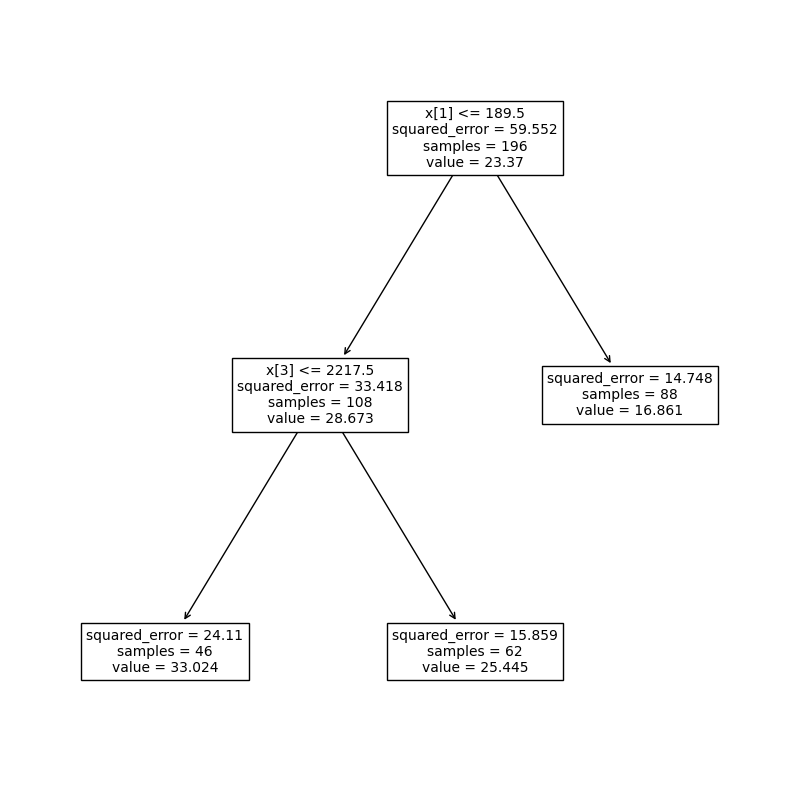

In [ ]:
#Present the Decision Tree:
plt.rcParams["figure.figsize"] = (10,10)
training_predictor_variables = train_data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']]
est_alpha = tree.DecisionTreeRegressor(ccp_alpha = alpha, random_state = 0)
model_alpha = est_alpha.fit(training_predictor_variables, train_data['mpg'])
tree.plot_tree(model_alpha, fontsize = 10)
plt.show()

In [ ]:
# The variable that is the most important in the tree:
training_predictor_variables.columns[1]

'displacement'

In [ ]:
# Model Specification II: (Bagging the tree)

len(train_predictor_variables.columns)

6

In [ ]:
# Bagged Tree:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

train_predictor = train_data[train_data.columns.drop("mpg")]

parameters = {'n_estimators': [10, 100, 500]}
est_bagged = RandomForestRegressor(max_features = 6, random_state=0)
tuning = GridSearchCV(est_bagged, parameters, cv = 5)
tuning_output = tuning.fit(train_predictor, train_data['mpg'])
tuning_output.best_params_

{'n_estimators': 100}

In [ ]:
# Model Estimation II:

from sklearn.ensemble import RandomForestRegressor
train_predictor_variables = train_data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']]


est_bagged = RandomForestRegressor(n_estimators = 100 , max_features = 6, random_state=0)
model_bagged = est_bagged.fit(train_predictor_variables, train_data['mpg'])

In [ ]:
model_bagged.feature_importances_

In [ ]:
plt.rcParams["figure.figsize"] = (8,6)
plt.bar(train_predictor.columns, model_bagged.feature_importances_)
plt.xlabel('Predictor')
plt.ylabel('Importance Score')
plt.title('Importance Score for each Predictor Variable')

In [ ]:
# Model Specification III:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
train_predictor = train_data[train_data.columns.drop("mpg")]

parameters = {'n_estimators': [10, 100, 500]}
est_RandomForest = RandomForestRegressor(max_features = 'sqrt', random_state=0)
tuning = GridSearchCV(est_RandomForest, parameters, cv = 5)
tuning_output = tuning.fit(train_predictor, train_data['mpg'])
tuning_output.best_params_


{'n_estimators': 100}

In [ ]:
# Model Estimation III:

from sklearn.ensemble import RandomForestRegressor
train_predictor_variables = train_data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']]


est_RandomForest = RandomForestRegressor(n_estimators = 100, max_features = 'sqrt', random_state=0)
model_randomforest = est_RandomForest.fit(train_predictor_variables, train_data['mpg'])

In [ ]:
model_randomforest.feature_importances_

In [ ]:
plt.rcParams["figure.figsize"] = (8,6)
plt.bar(train_predictor.columns, model_randomforest.feature_importances_)
plt.xlabel('Predictor')
plt.ylabel('Importance Score')
plt.title('Importance Score for each Predictor Variable')

In [ ]:
train_predictor = train_data[train_data.columns.drop("mpg")]

In [ ]:
# Model Specification IV:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

train_predictor = train_data[train_data.columns.drop("mpg")]

parameters = {'n_estimators': [10, 100, 500], 'learning_rate': [0.1, 0.01, 0.001]}
est_boost = GradientBoostingRegressor(max_depth=1, random_state=0)
tuning = GridSearchCV(est_boost, parameters, cv = 5)
tuning_output = tuning.fit(train_predictor, train_data['mpg'])
tuning_output.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [ ]:
# Model Estimation IV:
from sklearn.ensemble import RandomForestRegressor
train_predictor_variables = train_data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']]


est_boost = GradientBoostingRegressor(n_estimators=100, max_depth=1, random_state=0)
model_boost = est_boost.fit(train_predictor, train_data['mpg'])

In [ ]:
model_boost.feature_importances_

array([0.        , 0.27433651, 0.22700202, 0.30615442, 0.00822841,
       0.18427865])

Text(0.5, 1.0, 'Importance Score for each Predictor Variable')

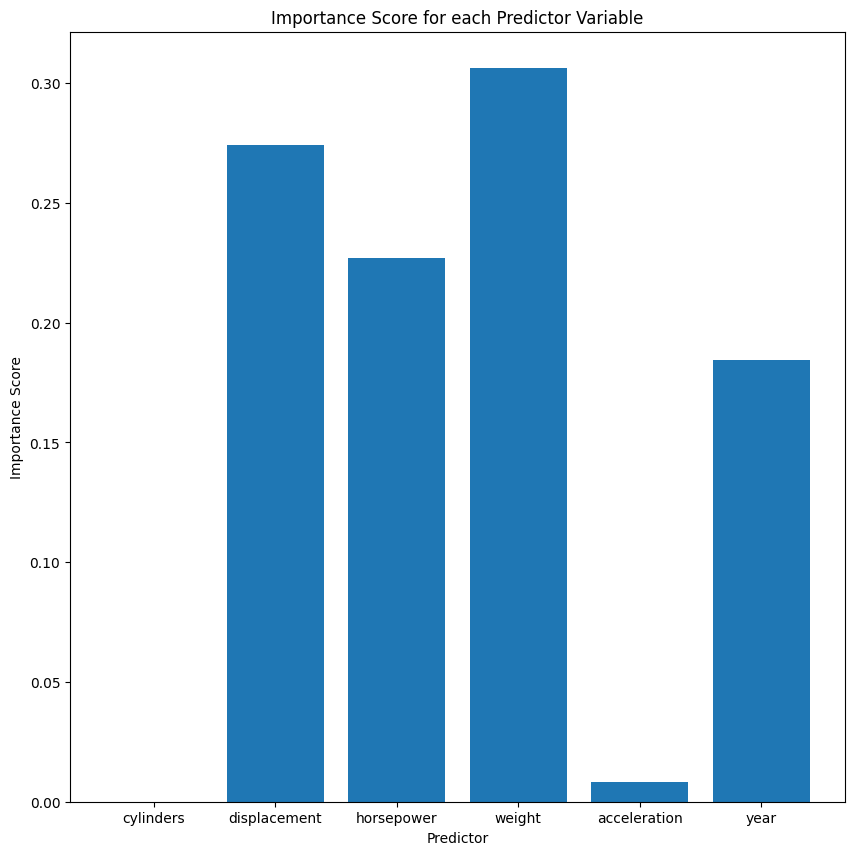

In [ ]:
plt.bar(train_predictor_variables.columns, model_boost.feature_importances_)
plt.xlabel('Predictor')
plt.ylabel('Importance Score')
plt.title('Importance Score for each Predictor Variable')

In [ ]:
# Model Assessment: (Using MSE)
# Model I


predictions_alpha = model_alpha.predict(test_predictor)
print(mean((test_data['mpg'] - predictions_alpha)**2))

20.75152863309424


In [ ]:
# Model II
test_predictor = test_data[test_data.columns.drop("mpg")]

predictions_bagged = model_bagged.predict(test_predictor)
print(mean((test_data['mpg'] - predictions_bagged)**2))

8.04601718877551


In [ ]:
# Model III:

predictions_RandomForest = model_RandomForest.predict(test_predictor)
print(mean((test_data['mpg'] - predictions_RandomForest)**2))

8.069578397959184


In [ ]:
# Model IV:
test_predictor = test_data[test_data.columns.drop("mpg")]

model_boost = tuning_output.best_estimator_
predictions_boost = model_boost.predict(test_predictor)
print(mean((test_data['mpg'] - predictions_boost)**2))

8.894926258309274


Model II has the lowest MSE, so we proceed with this model.

In [ ]:
# Model Deployment:
data = {'cylinders': [4],
        'displacement': [165],
        'horsepower': [110],
        'weight': [2500],
        'acceleration': [16.5],
        'year': [80]
       }
new_auto = pd.DataFrame(data)
model_bagged.predict(new_auto)

array([29.343])